<a href="https://colab.research.google.com/github/gabrielfernandorey/Bootcamp_DE_Sesion_01/blob/main/Pre_Clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="#15D3D9" size=5>Pre Clase 1</font></h1>

<h1><font color="#15D3D9" size=6>Análisis de desvinculaciones de empleados</font></h1>

<br>
<div style="text-align: left">
<font size=3>Alexander Jose Gabriel</font><br>
<font size=3>EDVai</font>
</div>

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime

In [2]:
# git_repository = "https://github.com/...../Bootcamp_DE_Sesion_01.git"

!git clone {git_repository}

Cloning into 'Bootcamp_DE_Sesion_01'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), 138.43 KiB | 538.00 KiB/s, done.


### Importar los datos 

In [3]:
df = pd.read_excel('/content/Bootcamp_DE_Sesion_01/Utimas Desvinculaciones.xlsx')
df

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos
0,1.0,Romina,Brito,Marketing,2018-03-05,2018-12-31,N3,Grupo B,3.0,Rango 3,Rango 3,1.0,SI
1,2.0,Pedro,Lujan,Compras,2017-03-06,2021-12-31,N3,Grupo B,3.0,Rango 2,Rango 2,2.0,SI
2,3.0,Juan,Albornoz,IT,2018-06-04,2019-04-30,N4,Grupo C,4.0,Rango 4,Rango 4,5.0,NO
3,4.0,Sebastian,González,Legales,2018-05-07,2021-05-30,N2,Grupo A,4.0,Rango 2,Rango 2,3.0,SI
4,5.0,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6.0,Rango 5,Rango 4,1.0,SI
5,6.0,Catalina,Gómez,Producción,2019-04-01,2022-03-31,N2,Grupo B,4.0,Rango 2,Rango 2,4.0,NO
6,7.0,Anabella,Fernández,Ventas,2020-07-06,2021-03-31,N4,Grupo A,3.0,Rango 4,Rango 4,8.0,NO
7,8.0,Francesca,López,Compras,2017-01-02,2021-06-30,N3,Grupo A,4.0,Rango 3,Rango 3,2.0,SI
8,9.0,Nicolas,Martínez,IT,2021-01-04,2021-11-30,N2,Grupo C,6.0,Rango 3,Rango 3,5.0,SI
9,10.0,Ana,Diaz,IT,2017-03-06,2020-11-30,N4,Grupo A,3.0,Rango 3,Rango 3,7.0,NO


**Detalle de variables**

- Nivel: nivel jerárquico dentro de la compañia, mas alto mas jerarquico
- Grupo recruitment: grupo de RRHH de la compañia responsable del ingreso del empleado
- Tiempo recruitment: tiempo desde contacto hasta incorporacion, medido en meses
- Rango Salarial: rango de sueldo del empleado
- RS competencia: rango salarial de mercado para la posición del empleado
- Manager: responsable a cargo del empleado

In [4]:
df_rangos = pd.read_excel('/content/Bootcamp_DE_Sesion_01/Utimas Desvinculaciones.xlsx', 'Rangos')
df_rangos

,Rango,desde,hasta
0,Rango 1,150000.0,200000.0
1,Rango 2,200001.0,250000.0
2,Rango 3,250001.0,300000.0
3,Rango 4,300001.0,350000.0
4,Rango 5,350001.0,400000.0
5,Rango 6,400001.0,500000.0
6,Rango 7,500001.0,600000.0
7,Rango 8,600001.0,700000.0
8,Rango 9,700001.0,800000.0
9,Rango 10,800001.0,1000000.0


In [5]:
df_managers = pd.read_excel('/content/Bootcamp_DE_Sesion_01/Utimas Desvinculaciones.xlsx', 'Managers')
df_managers

,Id,Nombre,Apellido
0,1.0,Rolando,Casas
1,2.0,Marina,Pitana
2,3.0,José,Feligres
3,4.0,Miriam,Pisani
4,5.0,Alejandro,Pitorino
5,6.0,Sonia,Kamlasky
6,7.0,Martín,Viglia
7,8.0,Ricardo,Ronaldo
8,9.0,Vanina,Quintana
9,10.0,Daniel,Quiroga


### Análisis Exploratorio de los Datos

**Estadística descriptiva analítica**

In [ ]:
df.describe()

,Id,Tiempo recruitment,Manager
count,30.000000,30.000000,30.000000
mean,15.500000,4.233333,5.566667
std,8.803408,1.104328,2.775302
min,1.000000,3.000000,1.000000
25%,8.250000,3.000000,3.250000
50%,15.500000,4.000000,5.500000
75%,22.750000,5.000000,8.000000
max,30.000000,6.000000,10.000000


Observaciones: 
- 30 empleados desvinculados como fuente de información
- 3 meses de minima para incorporacion de estos empleados en general
- 6 meses de maxima para incorporacion de estos empleados en general
- 4.23 meses promedio para incorporación de estos empleados en general

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  30 non-null     float64       
 1   Nombre              30 non-null     object        
 2   Apellido            30 non-null     object        
 3   Area                30 non-null     object        
 4   Fecha comienzo      30 non-null     datetime64[ns]
 5   Fecha fin           30 non-null     datetime64[ns]
 6   Nivel               30 non-null     object        
 7   Grupo recruitment   30 non-null     object        
 8   Tiempo recruitment  30 non-null     float64       
 9   Rango Salarial      30 non-null     object        
 10  RS competencia      30 non-null     object        
 11  Manager             30 non-null     float64       
 12  Realizo Cursos      30 non-null     object        
dtypes: datetime64[ns](2), float64(3), object(8)
memory u

**Verificacion de datos en cero** 

In [ ]:
df[df==0].count()

Id                    0
Nombre                0
Apellido              0
Area                  0
Fecha comienzo        0
Fecha fin             0
Nivel                 0
Grupo recruitment     0
Tiempo recruitment    0
Rango Salarial        0
RS competencia        0
Manager               0
Realizo Cursos        0
dtype: int64

No hay datos en cero

**Verificacion de datos no asignados** 

In [ ]:
df[df.isna()].count()

Id                    0
Nombre                0
Apellido              0
Area                  0
Fecha comienzo        0
Fecha fin             0
Nivel                 0
Grupo recruitment     0
Tiempo recruitment    0
Rango Salarial        0
RS competencia        0
Manager               0
Realizo Cursos        0
dtype: int64

No hay datos faltantes

**Verificacion de duplicados** 

In [ ]:
apellidos = df.Apellido.unique()
np.sort(apellidos)

array(['Albornoz', 'Benítez', 'Bosques', 'Brito', 'Buzos', 'Diaz',
       'Fernández', 'Flores', 'García', 'González', 'Gómez', 'Lujan',
       'López', 'Martin', 'Martini', 'Martínez', 'Molinas', 'Oliviera',
       'Pauls', 'Petersen', 'Prieto', 'Pérez', 'Quiroz', 'Ramírez',
       'Rodríguez', 'Romero', 'Ruiz', 'Sosa', 'Sánchez', 'Torres'],
      dtype=object)

No hay empleados duplicados

### Procesamiento

**Agregamos columna 'DPerm' (días de permanencia en la compañia)**

In [ ]:
df['DPerm'] = df['Fecha fin'] - df['Fecha comienzo']

In [ ]:
df.head()

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
0,1.0,Romina,Brito,Marketing,2018-03-05,2018-12-31,N3,Grupo B,3.0,Rango 3,Rango 3,1.0,SI,301 days
1,2.0,Pedro,Lujan,Compras,2017-03-06,2021-12-31,N3,Grupo B,3.0,Rango 2,Rango 2,2.0,SI,1761 days
2,3.0,Juan,Albornoz,IT,2018-06-04,2019-04-30,N4,Grupo C,4.0,Rango 4,Rango 4,5.0,NO,330 days
3,4.0,Sebastian,González,Legales,2018-05-07,2021-05-30,N2,Grupo A,4.0,Rango 2,Rango 2,3.0,SI,1119 days
4,5.0,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6.0,Rango 5,Rango 4,1.0,SI,213 days


### Visualización y análisis gráfico

**Grafico de desvinculaciones por sector**

IT            8
Ventas        6
Compras       5
Marketing     4
Producción    4
Auditoria     2
Legales       1
Name: Area, dtype: int64

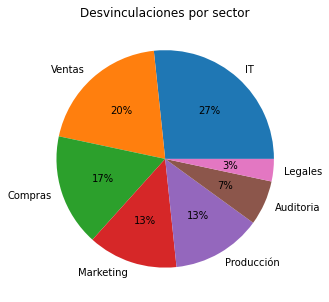

In [ ]:
a = df['Area'].value_counts()
fig = plt.figure(figsize =(18, 5))
fig.set_facecolor('white')
plt.title("Desvinculaciones por sector")
plt.pie(a, labels=a.index, autopct="%1.0f%%");
a

El sector de IT es el mas afectado con un 27% de desvinculaciones, luego el sector de ventas y compras con proporciones similares.

**Grafico de desvinculaciones por nivel de jerarquía**

N3    7
N4    7
N2    6
N5    5
N6    2
N7    2
N1    1
Name: Nivel, dtype: int64

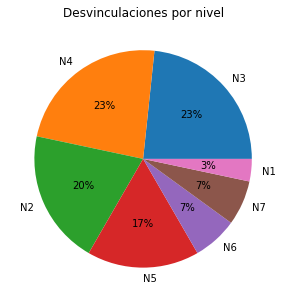

In [ ]:
a = df['Nivel'].value_counts()
fig = plt.figure(figsize =(18, 5))
fig.set_facecolor('white')
plt.title("Desvinculaciones por nivel")
plt.pie(a, labels=a.index, autopct="%1.0f%%");
a

- Los niveles N2, N3, N4 y N5 (niveles medios) son los mas afectados.
- En menor medida los niveles mas altos N6 y N7. El nivel 1 es el menos afectado

**Tiempos de permanencia**

In [ ]:
print(f"La permanencia promedio es de {df['DPerm'].mean()}")
print(f"El desvio estandard es de {df['DPerm'].std()}")
print(f"La mediana es {df['DPerm'].median()}")

La permanencia promedio es de 758 days 11:12:00
El desvio estandard es de 475 days 05:03:31.985242408
La mediana es 891 days 00:00:00


**Periodo del lote en estudio**

In [ ]:
desde = df['Fecha comienzo'].min()
hasta = df['Fecha fin'].max()
print(f"Periodo del lote en estudio desde: {str(desde)[:10]} hasta {str(hasta)[:10]}")

anios = int(str(pd.to_datetime(hasta) - pd.to_datetime(desde))[:4])/365
meses = int(str(pd.to_datetime(hasta) - pd.to_datetime(desde))[:4])%365/30
print(f"{round(anios)} años y {round(meses)} meses" )

Periodo del lote en estudio desde: 2017-01-02 hasta 2022-07-01
5 años y 6 meses


**Grafico de desvinculacion por año**

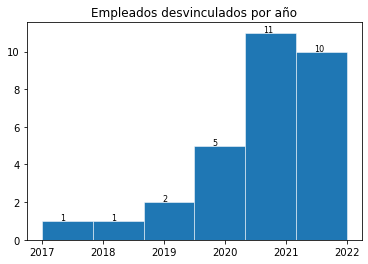

In [ ]:
fig, ax = plt.subplots()
v, m, g = ax.hist(pd.DatetimeIndex(df['Fecha fin']).year, bins=6, linewidth=0.5, edgecolor="white")
ax.set_title("Empleados desvinculados por año")
for i, rect in enumerate(g):
    posx = rect.get_x()
    posy = rect.get_height()
    ax.text(posx + 0.3, posy + 0.03 , int(v[i]), color='black', fontsize=8)
plt.show()

In [ ]:
df.sort_values(['Fecha fin'], ascending=True)

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
4,5.0,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6.0,Rango 5,Rango 4,1.0,SI,213 days
0,1.0,Romina,Brito,Marketing,2018-03-05,2018-12-31,N3,Grupo B,3.0,Rango 3,Rango 3,1.0,SI,301 days
2,3.0,Juan,Albornoz,IT,2018-06-04,2019-04-30,N4,Grupo C,4.0,Rango 4,Rango 4,5.0,NO,330 days
17,18.0,Pedro,Torres,Marketing,2017-04-03,2019-12-31,N3,Grupo B,4.0,Rango 3,Rango 3,9.0,SI,1002 days
13,14.0,Raul,García,Ventas,2019-02-04,2020-03-31,N3,Grupo C,6.0,Rango 3,Rango 3,8.0,SI,421 days
15,16.0,Vanina,Benítez,IT,2019-08-05,2020-04-30,N5,Grupo C,5.0,Rango 6,Rango 6,5.0,SI,269 days
9,10.0,Ana,Diaz,IT,2017-03-06,2020-11-30,N4,Grupo A,3.0,Rango 3,Rango 3,7.0,NO,1365 days
20,21.0,Cristian,Martin,Compras,2017-11-06,2020-12-31,N5,Grupo C,4.0,Rango 6,Rango 5,2.0,SI,1151 days
11,12.0,Luis,Sánchez,Ventas,2020-07-13,2020-12-31,N5,Grupo C,5.0,Rango 6,Rango 6,8.0,NO,171 days
18,19.0,Rocio,Ruiz,Auditoria,2018-02-05,2021-01-30,N4,Grupo A,4.0,Rango 4,Rango 5,10.0,NO,1090 days


**Analisis sector IT**

In [ ]:
# Managers de IT
len(df.Manager[df.Area=='IT'].value_counts())

2

In [ ]:
df[df.Area=='IT'].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
22,23.0,Camila,Prieto,IT,2022-01-03,2022-07-01,N6,Grupo C,6.0,Rango 6,Rango 6,5.0,NO,179 days
15,16.0,Vanina,Benítez,IT,2019-08-05,2020-04-30,N5,Grupo C,5.0,Rango 6,Rango 6,5.0,SI,269 days
28,29.0,Dante,Martini,IT,2021-03-01,2021-12-31,N4,Grupo C,6.0,Rango 3,Rango 3,5.0,NO,305 days
2,3.0,Juan,Albornoz,IT,2018-06-04,2019-04-30,N4,Grupo C,4.0,Rango 4,Rango 4,5.0,NO,330 days
8,9.0,Nicolas,Martínez,IT,2021-01-04,2021-11-30,N2,Grupo C,6.0,Rango 3,Rango 3,5.0,SI,330 days
12,13.0,Alejandro,Romero,IT,2020-06-01,2022-02-28,N3,Grupo A,3.0,Rango 4,Rango 3,7.0,SI,637 days
16,17.0,Guillermo,Ramírez,IT,2020-01-06,2022-05-31,N2,Grupo A,3.0,Rango 2,Rango 2,7.0,NO,876 days
9,10.0,Ana,Diaz,IT,2017-03-06,2020-11-30,N4,Grupo A,3.0,Rango 3,Rango 3,7.0,NO,1365 days


- Podemos observar que los empleados desvinculados del area de IT de menor permanencia coincide con el **Grupo C**

In [ ]:
# Tiempo promedio de incorporacion de empleados del Grupo C
_ = df[(df.Area=='IT') & (df['Grupo recruitment']=='Grupo C')]['Tiempo recruitment'].mean()*30
print(f"Tiempo promedio de incorporacion de empleados del sector IT del Grupo C: {round(_)} días")

Tiempo promedio de incorporacion de empleados del sector IT del Grupo C: 162 días


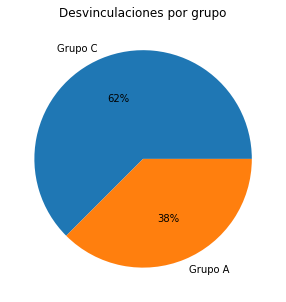

In [ ]:
# Grafico de desvinculaciones por Grupo de reclutamiento
a = df['Grupo recruitment'][df.Area=='IT'].value_counts()
fig = plt.figure(figsize =(18, 5))
fig.set_facecolor('white')
plt.title("Desvinculaciones por grupo")
plt.pie(a, labels=a.index, autopct="%1.0f%%");

Observaciones:
- Hemos detectado para el sector de IT lo siguiente:
    - A. La desvinculacion de empleados se corresponde con el 62% del total para el Grupo C, y 38% para el Grupo A
    - B. La permanencia de empleados para el Grupo C no supera el año en la compañia, mientras que para el Grupo A se encuentra en el rango de entre 2 y 4 años.
    - C. El tiempo de incorporacion promedio para el Grupo C es de 162 días, mientras que para el Grupo A es de 90 días en promedio.
    - D. Todos los pertenecientes al Grupo C tambien hantenido como manager a (5) Alejandro Pitorino.
    - E. El nivel jerárquico de los empleados del Grupo C es mayor al nivel jerarquico de los del Grupo A
    - F. En cuanto al salario percibido respecto de la competencia practicamente no existen grandes diferencias.
    

**Analisis sector Ventas**

In [ ]:
# Managers de Ventas
len(df.Manager[df.Area=='Ventas'].value_counts())

1

In [ ]:
df[df.Area=='Ventas'].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
11,12.0,Luis,Sánchez,Ventas,2020-07-13,2020-12-31,N5,Grupo C,5.0,Rango 6,Rango 6,8.0,NO,171 days
24,25.0,Carolina,Petersen,Ventas,2021-07-05,2022-02-28,N7,Grupo B,4.0,Rango 6,Rango 6,8.0,SI,238 days
19,20.0,Marcelo,Flores,Ventas,2021-09-06,2022-05-31,N2,Grupo C,6.0,Rango 2,Rango 2,8.0,SI,267 days
6,7.0,Anabella,Fernández,Ventas,2020-07-06,2021-03-31,N4,Grupo A,3.0,Rango 4,Rango 4,8.0,NO,268 days
13,14.0,Raul,García,Ventas,2019-02-04,2020-03-31,N3,Grupo C,6.0,Rango 3,Rango 3,8.0,SI,421 days
21,22.0,Matias,Bosques,Ventas,2018-12-03,2021-06-30,N4,Grupo B,3.0,Rango 4,Rango 4,8.0,SI,940 days


- Podemos observar que hay mayoria de empleados desvinculados del area de Ventas perteneciente al **Grupo C**

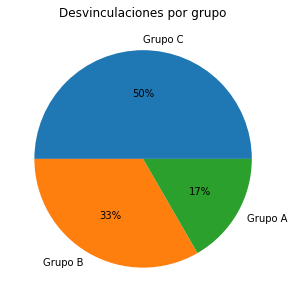

In [ ]:
# Grafico de desvinculaciones por Grupo de reclutamiento
a = df['Grupo recruitment'][df.Area=='Ventas'].value_counts()
fig = plt.figure(figsize =(18, 5))
fig.set_facecolor('white')
plt.title("Desvinculaciones por grupo")
plt.pie(a, labels=a.index, autopct="%1.0f%%");

In [ ]:
# Tiempo promedio de incorporacion de empleados del Grupo C
df[(df.Area=='Ventas') & (df['Grupo recruitment']=='Grupo C')]['Tiempo recruitment'].mean()*30

Observaciones:
- Hemos detectado para el sector de Ventas lo siguiente:
    - A. La desvinculacion de empleados se corresponde con el 50% para el Grupo C.
    - B. La permanencia de empleados para el Grupo C sigue siendo en promedio de 1 año 
    - C. El tiempo de incorporacion promedio para el Grupo C es de 170 días.
    - D. En cuanto al salario percibido respecto de la competencia practicamente no existen grandes diferencias.
    

**Analisis sector Compras**

In [ ]:
# Managers de Compras
len(df.Manager[df.Area=='Compras'].value_counts())

1

In [ ]:
df[df.Area=='Compras'].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
26,27.0,Rodrigo,Molinas,Compras,2019-06-03,2022-04-30,N2,Grupo A,4.0,Rango 2,Rango 2,2.0,SI,1062 days
20,21.0,Cristian,Martin,Compras,2017-11-06,2020-12-31,N5,Grupo C,4.0,Rango 6,Rango 5,2.0,SI,1151 days
14,15.0,Analia,Sosa,Compras,2018-10-01,2021-11-30,N4,Grupo A,4.0,Rango 4,Rango 4,2.0,NO,1156 days
7,8.0,Francesca,López,Compras,2017-01-02,2021-06-30,N3,Grupo A,4.0,Rango 3,Rango 3,2.0,SI,1640 days
1,2.0,Pedro,Lujan,Compras,2017-03-06,2021-12-31,N3,Grupo B,3.0,Rango 2,Rango 2,2.0,SI,1761 days


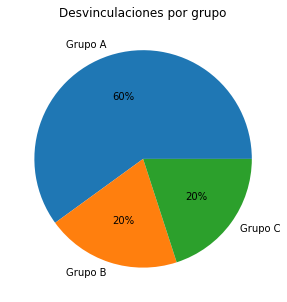

In [ ]:
# Grafico de desvinculaciones por Grupo de reclutamiento
a = df['Grupo recruitment'][df.Area=='Compras'].value_counts()
fig = plt.figure(figsize =(18, 5))
fig.set_facecolor('white')
plt.title("Desvinculaciones por grupo")
plt.pie(a, labels=a.index, autopct="%1.0f%%");

In [ ]:
# Tiempo promedio de incorporacion de empleados de todos los grupos
df[df.Area=='Compras']['Tiempo recruitment'].mean()*30

114.0

Observaciones:
- Hemos detectado para el sector de Compras lo siguiente:
    - A. La desvinculacion de empleados se corresponde con el 6% para el Grupo A.
    - B. La permanencia de los empleados de compras es de 3 años de mínima
    - C. El tiempo de incorporacion promedio para estos empleaos fue de 114 días.
    - D. En cuanto al salario percibido respecto de la competencia practicamente no existen grandes diferencias.

**Analisis sector Marketing**

In [ ]:
# Managers de Marketing
len(df.Manager[df.Area=='Marketing'].value_counts())

2

In [ ]:
df[df.Area=='Marketing'].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
4,5.0,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6.0,Rango 5,Rango 4,1.0,SI,213 days
0,1.0,Romina,Brito,Marketing,2018-03-05,2018-12-31,N3,Grupo B,3.0,Rango 3,Rango 3,1.0,SI,301 days
17,18.0,Pedro,Torres,Marketing,2017-04-03,2019-12-31,N3,Grupo B,4.0,Rango 3,Rango 3,9.0,SI,1002 days
10,11.0,Roberto,Pérez,Marketing,2019-07-01,2022-04-30,N5,Grupo B,5.0,Rango 5,Rango 5,9.0,SI,1034 days


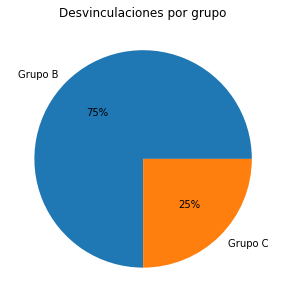

In [ ]:
# Grafico de desvinculaciones por Grupo de reclutamiento
a = df['Grupo recruitment'][df.Area=='Marketing'].value_counts()
fig = plt.figure(figsize =(18, 5))
fig.set_facecolor('white')
plt.title("Desvinculaciones por grupo")
plt.pie(a, labels=a.index, autopct="%1.0f%%");

In [ ]:
# Tiempo promedio de incorporacion de empleados del Grupo B
df[(df.Area=='Marketing') & (df['Grupo recruitment']=='Grupo B')]['Tiempo recruitment'].mean()*30

120.0

Observaciones:
- Hemos detectado para el sector de Marketing lo siguiente:
    - A. La desvinculacion de empleados se corresponde con el 75% para el Grupo B.
    - B. La permanencia de los empleados de marketing estan en el rango desde 1 a 3 años, pero el del Grupo C es el menor, no llega al año.
    - C. El tiempo de incorporacion promedio para los empleados del Grupo B es de 120 días y de 180 días para el Grupo C
    - D. En cuanto al salario percibido respecto de la competencia practicamente no existen grandes diferencias.

**Analisis sector Produccion**

In [ ]:
# Managers de Produccion
len(df.Manager[df.Area=='Producción'].value_counts())

2

In [ ]:
df[df.Area=='Producción'].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
27,28.0,Martina,Oliviera,Producción,2020-01-06,2022-06-30,N7,Grupo A,4.0,Rango 6,Rango 6,6.0,SI,906 days
23,24.0,Micaela,Pauls,Producción,2019-01-07,2021-12-31,N6,Grupo A,5.0,Rango 6,Rango 6,4.0,SI,1089 days
5,6.0,Catalina,Gómez,Producción,2019-04-01,2022-03-31,N2,Grupo B,4.0,Rango 2,Rango 2,4.0,NO,1095 days
25,26.0,Fabian,Quiroz,Producción,2018-05-07,2021-09-30,N3,Grupo B,3.0,Rango 2,Rango 3,6.0,SI,1242 days


Observaciones:
- Hemos detectado para el sector de Producción lo siguiente:
    - A. La desvinculacion de empleados se corresponde en partes iguales entre el Grupo A y B
    - B. La permanencia de los empleados de produccion estan en el rango de 2.5 a 3.5 años.
    - C. El tiempo de incorporacion promedio para produccion es de 120 días.
    - D. En cuanto al salario percibido respecto de la competencia practicamente no existen grandes diferencias.

**Analisis sector Auditoria y Legales**

In [ ]:
# Managers de Auditoria y Legales
len(df.Manager[ (df.Area=='Auditoria') | (df.Area=='Legales') ].value_counts())

2

In [ ]:
df[(df.Area=='Auditoria') | (df.Area=='Legales')].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
29,30.0,Diego,Buzos,Auditoria,2021-09-06,2022-06-30,N1,Grupo C,3.0,Rango 1,Rango 1,10.0,SI,297 days
18,19.0,Rocio,Ruiz,Auditoria,2018-02-05,2021-01-30,N4,Grupo A,4.0,Rango 4,Rango 5,10.0,NO,1090 days
3,4.0,Sebastian,González,Legales,2018-05-07,2021-05-30,N2,Grupo A,4.0,Rango 2,Rango 2,3.0,SI,1119 days


Observaciones:
- Hemos detectado para el sector de Auditoria y Legales lo siguiente:
    - A. La permanencia del empleado de auditoria perteneciente al Grupo C no llega a 1 año.

**Analisis del Grupo C**

In [ ]:
df[ df['Grupo recruitment']=='Grupo C'].sort_values('DPerm')

,Id,Nombre,Apellido,Area,Fecha comienzo,Fecha fin,Nivel,Grupo recruitment,Tiempo recruitment,Rango Salarial,RS competencia,Manager,Realizo Cursos,DPerm
11,12.0,Luis,Sánchez,Ventas,2020-07-13,2020-12-31,N5,Grupo C,5.0,Rango 6,Rango 6,8.0,NO,171 days
22,23.0,Camila,Prieto,IT,2022-01-03,2022-07-01,N6,Grupo C,6.0,Rango 6,Rango 6,5.0,NO,179 days
4,5.0,Franco,Rodríguez,Marketing,2017-05-01,2017-11-30,N5,Grupo C,6.0,Rango 5,Rango 4,1.0,SI,213 days
19,20.0,Marcelo,Flores,Ventas,2021-09-06,2022-05-31,N2,Grupo C,6.0,Rango 2,Rango 2,8.0,SI,267 days
15,16.0,Vanina,Benítez,IT,2019-08-05,2020-04-30,N5,Grupo C,5.0,Rango 6,Rango 6,5.0,SI,269 days
29,30.0,Diego,Buzos,Auditoria,2021-09-06,2022-06-30,N1,Grupo C,3.0,Rango 1,Rango 1,10.0,SI,297 days
28,29.0,Dante,Martini,IT,2021-03-01,2021-12-31,N4,Grupo C,6.0,Rango 3,Rango 3,5.0,NO,305 days
2,3.0,Juan,Albornoz,IT,2018-06-04,2019-04-30,N4,Grupo C,4.0,Rango 4,Rango 4,5.0,NO,330 days
8,9.0,Nicolas,Martínez,IT,2021-01-04,2021-11-30,N2,Grupo C,6.0,Rango 3,Rango 3,5.0,SI,330 days
13,14.0,Raul,García,Ventas,2019-02-04,2020-03-31,N3,Grupo C,6.0,Rango 3,Rango 3,8.0,SI,421 days


In [ ]:
# Permanencia promedio para los empleados del Grupo C
DPerm_C = df.DPerm[ df['Grupo recruitment']=='Grupo C'].mean()
print(f"Permanencia promedio: {str(DPerm_C)[:4]}dias")

Permanencia promedio: 357 dias


In [ ]:
# Tiempo promedio de incorporacion de empleados del Grupo C
print(f"Promedio de tiempo de incorporacion: {round(df['Tiempo recruitment'][ df['Grupo recruitment']=='Grupo C'].mean()*30)} días")

Promedio de tiempo de incorporacion: 155 días


**Analisis de todos los grupos**
Preparamos una tabla para comparar permanencia e incorporacion de los grupos A B y C

In [ ]:
DPerm_A = df.DPerm[ df['Grupo recruitment']=='Grupo A'].mean()
DPerm_B = df.DPerm[ df['Grupo recruitment']=='Grupo B'].mean()

In [ ]:
incorp_A = round(df['Tiempo recruitment'][ df['Grupo recruitment']=='Grupo A'].mean()*30)
incorp_B = round(df['Tiempo recruitment'][ df['Grupo recruitment']=='Grupo B'].mean()*30)
incorp_C = round(df['Tiempo recruitment'][ df['Grupo recruitment']=='Grupo C'].mean()*30)

In [ ]:
data = {"Grupos":["A","B","C"],
        "Permanencia":[str(DPerm_A)[:4], str(DPerm_B)[:4], str(DPerm_C)[:4]],
        "Incorporacion":[incorp_A, incorp_B, incorp_C]
       }

In [ ]:
# Tabla de comparacion de variables mas significativas para comparar Grupos
result = pd.DataFrame(data)
result

,Grupos,Permanencia,Incorporacion
0,A,1018,112
1,B,951,109
2,C,357,155


<div class="alert alert-warning"><b>Conclusion</b></div>

Del análisis realizado para todos los sectores se detecta que el Grupo C obtiene las peores métricas de eficiencia en función de:
- la permanencia de los empleados contratados por este grupo es la mas baja, con 357 días en promedio y es aproximadamente la tercera parte del Grupo B.
- por otra parte, el tiempo de incorporacion es de 155 días en promedio siendo un 50% menos eficiente que el Grupo A y B

<div class="alert alert-warning"><b>Consideraciones</b></div>

En funcion del analisis realizado y antes de proponer acciones al respecto es importante destacar:
- No se conoce la plantilla de empleados totales, y por ende no se puede calcular la tasa de rotación
- El tiempo de permanencia promedio del lote de empleados de estudio es de 758 días (2 años) y se entiende como no deseable
- Se observa que la tasa de desvinculación aumenta progresivamente

### **Posibles Acciones**